In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
%matplotlib inline

/Users/yapkan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read csv with all data info
filename1 = 'results/resnet_20_all_5_on/predictions.csv'
filename2 = 'results/resnet_20_fc_5_on/predictions.csv'

filename3 = 'results/vgg_20_all_5_on/predictions.csv'
filename4 = 'results/vgg_20_fc_5_on/predictions.csv'
filename5 = 'results/vgg_20_last_5_on/predictions.csv'

resnet_all = pd.read_csv(filename1, usecols=['predictions'])
resnet_fc = pd.read_csv(filename2, usecols=['predictions'])

vgg_all = pd.read_csv(filename3, usecols=['predictions'])
vgg_fc = pd.read_csv(filename4, usecols=['predictions'])
vgg_last = pd.read_csv(filename5, usecols=['predictions'])

df = pd.read_csv('data/test.csv')
#df = df.drop(columns=['1', '5', '10', '50', '100'])
df.head()

artist  date           genre               style  \
0     Marcel Broodthaers  1969      figurative      Conceptual Art   
1    John Singer Sargent  1876          marina       Impressionism   
2  William Merritt Chase  1882        interior       Impressionism   
3           Claude Monet  1902       landscape       Impressionism   
4       Christopher Wood  1930  genre painting  Post-Impressionism   

                            title    filename     1          5         10  \
0                          Minuit   14515.jpg  1969  1965-1969  1960-1969   
1                  Atlantic Storm   94528.jpg  1876  1875-1879  1870-1879   
2  The Inner Studio, Tenth Street   93146.jpg  1882  1880-1884  1880-1889   
3         Charing Cross Bridge 02  102612.jpg  1902  1900-1904  1900-1909   
4     Building the Boat, Tréboul    58078.jpg  1930  1930-1934  1930-1939   

          20         50        100  
0  1960-1979  1950-1999  1900-1999  
1  1860-1879  1850-1899  1800-1899  
2  1880-1899  1850-1899  1800-1899  
3  1900-1919  1900-1949  1900-1999  
4  1920-1939  1900-1949  1900-1999

In [3]:
df['res_all'] = resnet_all
df['res_fc'] = resnet_fc
df['vgg_all'] = vgg_all
df['vgg_fc'] = vgg_fc
df['vgg_last'] = vgg_last
df.head()

artist  date           genre               style  \
0     Marcel Broodthaers  1969      figurative      Conceptual Art   
1    John Singer Sargent  1876          marina       Impressionism   
2  William Merritt Chase  1882        interior       Impressionism   
3           Claude Monet  1902       landscape       Impressionism   
4       Christopher Wood  1930  genre painting  Post-Impressionism   

                            title    filename     1          5         10  \
0                          Minuit   14515.jpg  1969  1965-1969  1960-1969   
1                  Atlantic Storm   94528.jpg  1876  1875-1879  1870-1879   
2  The Inner Studio, Tenth Street   93146.jpg  1882  1880-1884  1880-1889   
3         Charing Cross Bridge 02  102612.jpg  1902  1900-1904  1900-1909   
4     Building the Boat, Tréboul    58078.jpg  1930  1930-1934  1930-1939   

          20         50        100    res_all     res_fc    vgg_all  \
0  1960-1979  1950-1999  1900-1999  1920-1939  1980-1999  1920-1939   
1  1860-1879  1850-1899  1800-1899  1880-1899  1900-1919  1860-1879   
2  1880-1899  1850-1899  1800-1899  1880-1899  1900-1919  1880-1899   
3  1900-1919  1900-1949  1900-1999  1900-1919  1900-1919  1900-1919   
4  1920-1939  1900-1949  1900-1999  1920-1939  1900-1919  1900-1919   

      vgg_fc   vgg_last  
0  1900-1919  1960-1979  
1  1860-1879  1920-1939  
2  1900-1919  1880-1899  
3  1900-1919  1900-1919  
4  1920-1939  1960-1979

In [4]:
df['res_all_acc'] = df['res_all'] == df['20']
df['res_fc_acc'] = df['res_fc'] == df['20']
df['vgg_all_acc'] = df['vgg_all'] == df['20']
df['vgg_fc_acc'] = df['vgg_fc'] == df['20']
df['vgg_last_acc'] = df['vgg_last'] == df['20']
df.head()

artist  date           genre               style  \
0     Marcel Broodthaers  1969      figurative      Conceptual Art   
1    John Singer Sargent  1876          marina       Impressionism   
2  William Merritt Chase  1882        interior       Impressionism   
3           Claude Monet  1902       landscape       Impressionism   
4       Christopher Wood  1930  genre painting  Post-Impressionism   

                            title    filename     1          5         10  \
0                          Minuit   14515.jpg  1969  1965-1969  1960-1969   
1                  Atlantic Storm   94528.jpg  1876  1875-1879  1870-1879   
2  The Inner Studio, Tenth Street   93146.jpg  1882  1880-1884  1880-1889   
3         Charing Cross Bridge 02  102612.jpg  1902  1900-1904  1900-1909   
4     Building the Boat, Tréboul    58078.jpg  1930  1930-1934  1930-1939   

          20      ...         res_all     res_fc    vgg_all     vgg_fc  \
0  1960-1979      ...       1920-1939  1980-1999  1920-1939  1900-1919   
1  1860-1879      ...       1880-1899  1900-1919  1860-1879  1860-1879   
2  1880-1899      ...       1880-1899  1900-1919  1880-1899  1900-1919   
3  1900-1919      ...       1900-1919  1900-1919  1900-1919  1900-1919   
4  1920-1939      ...       1920-1939  1900-1919  1900-1919  1920-1939   

    vgg_last res_all_acc res_fc_acc  vgg_all_acc  vgg_fc_acc  vgg_last_acc  
0  1960-1979       False      False        False       False          True  
1  1920-1939       False      False         True        True         False  
2  1880-1899        True      False         True       False          True  
3  1900-1919        True       True         True        True          True  
4  1960-1979        True      False        False        True         False  

[5 rows x 22 columns]

In [5]:
df['all_true'] = df[['res_all_acc', 'res_fc_acc', 'vgg_all_acc', 'vgg_fc_acc', 'vgg_last_acc']].all(axis=1)
df['res_true'] = (df['res_all_acc'] == True) & (df['res_fc_acc'] == True) & (df['vgg_all_acc'] == False) & (df['vgg_fc_acc'] == False) & (df['vgg_last_acc'] == False)
df['vgg_true'] = (df['res_all_acc'] == False) & (df['res_fc_acc'] == False) & (df['vgg_all_acc'] == True) & (df['vgg_fc_acc'] == True) & (df['vgg_last_acc'] == True)

print(df['all_true'].sum())
df.head(50)

332


artist  date                  genre  \
0       Marcel Broodthaers  1969             figurative   
1      John Singer Sargent  1876                 marina   
2    William Merritt Chase  1882               interior   
3             Claude Monet  1902              landscape   
4         Christopher Wood  1930         genre painting   
5    Theo van Rysselberghe  1911             still life   
6      John Singer Sargent  1887               portrait   
7        Wassily Kandinsky  1917               abstract   
8                 Otto Dix  1912          self-portrait   
9          Frantisek Kupka  1908     nude painting (nu)   
10  John Atkinson Grimshaw  1893              landscape   
11           Pablo Picasso  1961         genre painting   
12           David Bomberg  1947              landscape   
13          Jacques Hérold  1938               portrait   
14        Vincent van Gogh  1888       sketch and study   
15           Alfred Sisley  1877              landscape   
16           Pablo Picasso  1932         genre painting   
17    Zinaida Serebriakova  1927     nude painting (nu)   
18               Jack Bush  1943              cityscape   
19           Rene Magritte  1927      symbolic painting   
20               Ken Danby  1974               portrait   
21         Arman Manookian  1928         genre painting   
22       Winston Churchill  1921              cityscape   
23           Wyndham Lewis  1933               portrait   
24        Nicholas Roerich  1925      symbolic painting   
25      Henryk Siemiradzki  1895         genre painting   
26        Umberto Boccioni  1908              landscape   
27           Eugene Boudin  1895              cityscape   
28          Berthe Morisot  1875         genre painting   
29     John Singer Sargent  1911         genre painting   
30     John Singer Sargent  1889         genre painting   
31          Friedel Dzubas  1964               abstract   
32           Childe Hassam  1886                 marina   
33          Thomas Downing  1962               abstract   
34          Henri Rousseau  1886         genre painting   
35             Carlo Carra  1924              landscape   
36          Leon Underwood  1922               portrait   
37  Carlos Saenz de Tejada  1918     nude painting (nu)   
38          Niko Pirosmani  1906         genre painting   
39         Raja Ravi Varma  1910  mythological painting   
40              Emil Nolde  1942        flower painting   
41         Martiros Saryan  1911       sketch and study   
42     John Singer Sargent  1905              landscape   
43        Aleksey Savrasov  1869              landscape   
44  Victor Borisov-Musatov  1900         genre painting   
45            Paul Cezanne  1879             still life   
46      Laszlo Moholy-Nagy  1923               abstract   
47     Alekos Kontopoulos   1972             figurative   
48        Unichi Hiratsuka  1935        animal painting   
49        Aleksey Savrasov  1888              landscape   

                      style                                title    filename  \
0            Conceptual Art                               Minuit   14515.jpg   
1             Impressionism                       Atlantic Storm   94528.jpg   
2             Impressionism       The Inner Studio, Tenth Street   93146.jpg   
3             Impressionism              Charing Cross Bridge 02  102612.jpg   
4        Post-Impressionism          Building the Boat, Tréboul    58078.jpg   
5        Post-Impressionism                      Vase of Flowers   86709.jpg   
6                   Realism                Mrs. William Playfair   27566.jpg   
7              Abstract Art                     Improvisation 29   64187.jpg   
8                    Verism                        Self-Portrait   94279.jpg   
9             Expressionism          The Little Girl with a Ball   72696.jpg   
10              Romanticism                         Golden Light    3680.jpg   
11            Expressionism            The Luncheo

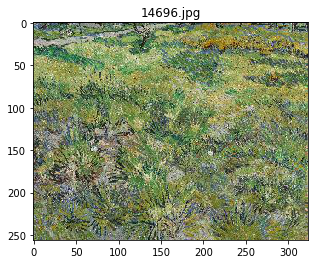

In [6]:
filename = df['filename'].iloc[291]
img = image.load_img('data/train/' + filename)
plt.title(filename)
plt.imshow(img)

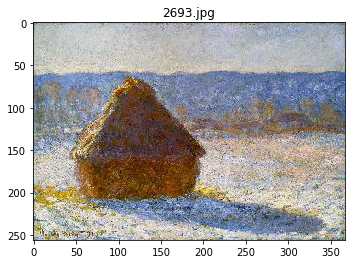

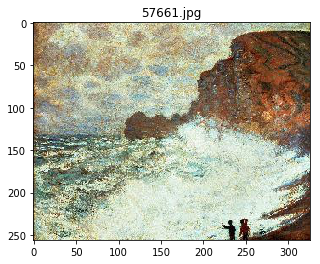

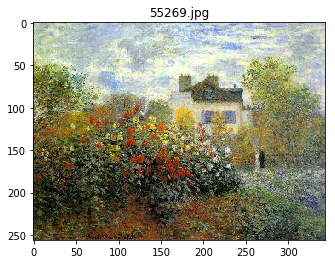

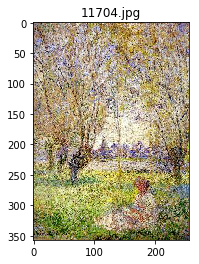

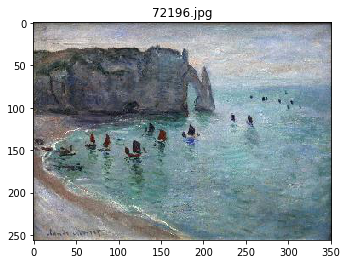

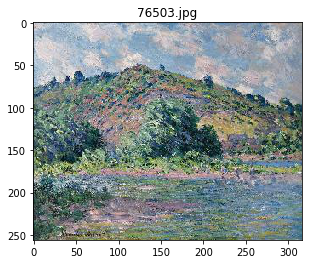

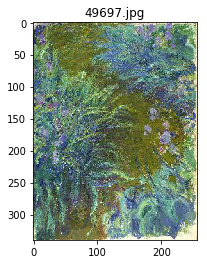

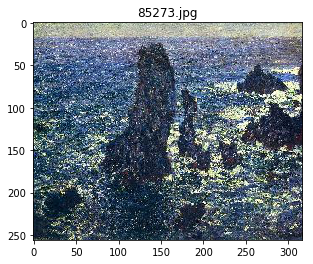

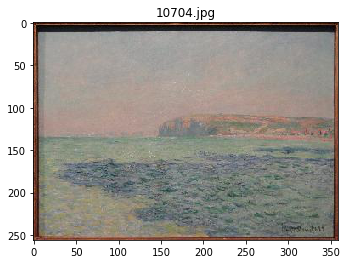

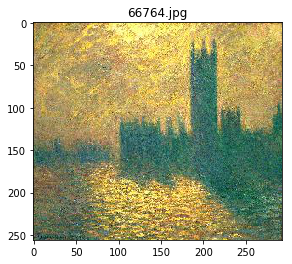

In [7]:
counter = 0
for index, row in df.iterrows():
    if (row['artist'] == 'Claude Monet') & (row['res_all_acc'] == True) & (row['vgg_fc_acc'] == False):
        counter += 1
        filename = row['filename']
        img = image.load_img('data/train/' + filename)
        plt.figure()
        plt.title(filename)
        plt.imshow(img)
    
    if counter == 10:
        break

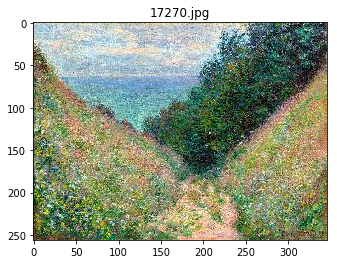

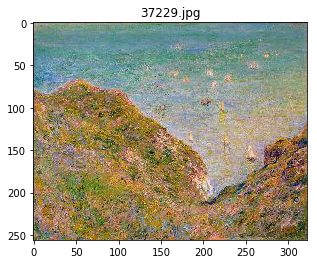

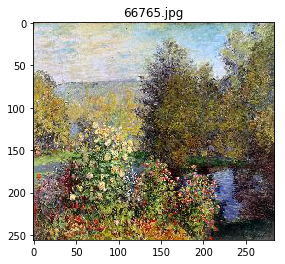

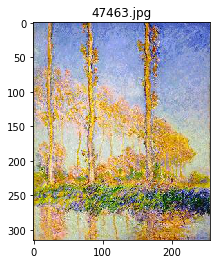

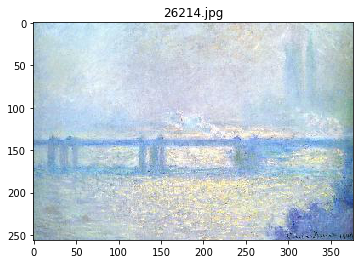

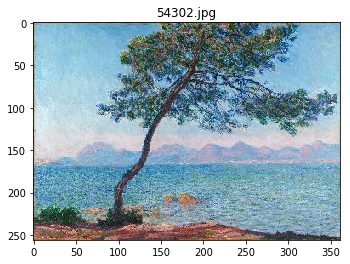

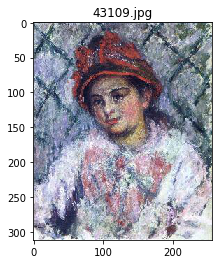

In [8]:
counter = 0
for index, row in df.iterrows():
    if (row['artist'] == 'Claude Monet') & (row['res_all_acc'] == False) & (row['vgg_fc_acc'] == True):
        counter += 1
        filename = row['filename']
        img = image.load_img('data/train/' + filename)
        plt.figure()
        plt.title(filename)
        plt.imshow(img)
    
    if counter == 10:
        break

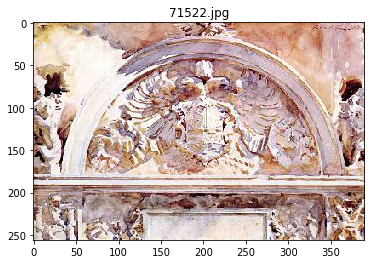

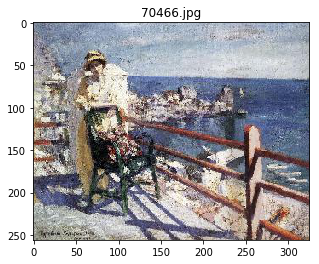

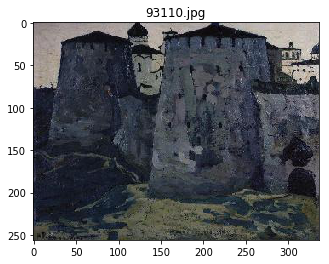

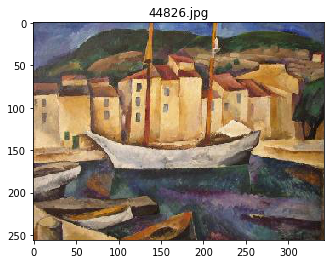

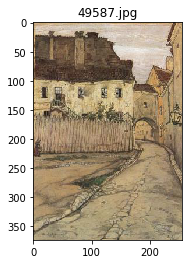

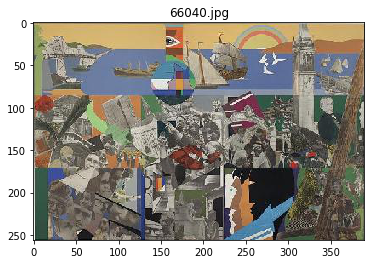

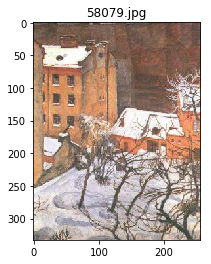

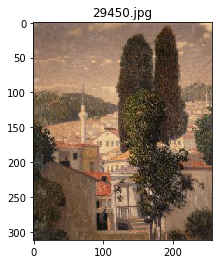

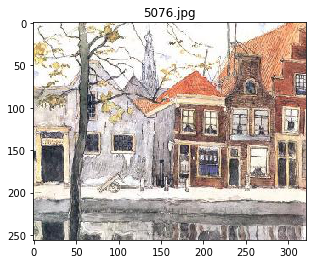

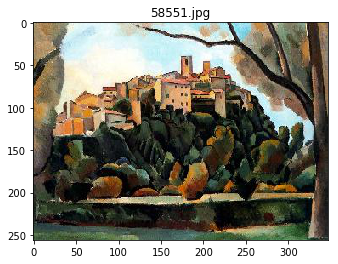

In [9]:
# RESNET CORRECT, VGG NOT CORRECT
counter = 0
for index, row in df.iterrows():
    if (row['res_true'] == True) & (row['genre'] == 'cityscape'):
        counter += 1
        filename = row['filename']
        img = image.load_img('data/train/' + filename)
        plt.figure()
        plt.title(filename)
        plt.imshow(img)
    
    if counter == 10:
        break

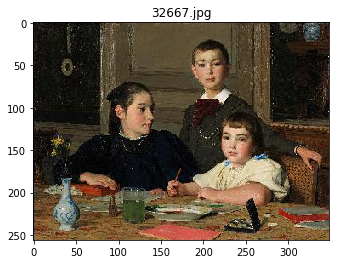

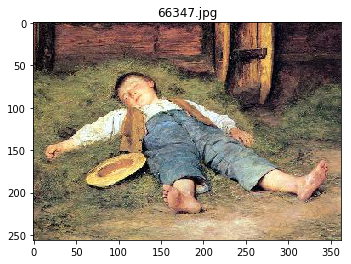

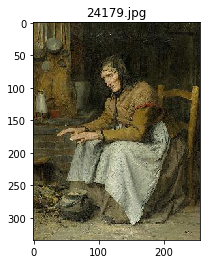

In [10]:
# RESNET NOT CORRECT, VGG CORRECT
counter = 0
for index, row in df.iterrows():
    if (row['vgg_true'] == True) & (row['artist'] == 'Albert Anker'):        
        counter += 1
        filename = row['filename']
        img = image.load_img('data/train/' + filename)
        plt.figure()
        plt.title(filename)
        plt.imshow(img)
    
    if counter == 10:
        break

In [11]:
df_groupby = df.groupby(['style'])['all_true'].mean()
df_groupby = df_groupby.reset_index().sort_values(['all_true'],ascending=False)
df_groupby.head()

style  all_true
93                 Synchromism  1.000000
71                 Perceptism   0.500000
34          Hard Edge Painting  0.487179
55              Neo-Concretism  0.400000
77  Post-Painterly Abstraction  0.368421

In [12]:
df_groupby = df.groupby(['style'])['res_all_acc', 'res_fc_acc', 'vgg_all_acc', 'vgg_fc_acc', 'vgg_last_acc', 'all_true'].sum()
df_groupby = df_groupby.reset_index().sort_values(['vgg_fc_acc'],ascending=False)
df_groupby.head(10)

style  res_all_acc  res_fc_acc  vgg_all_acc  vgg_fc_acc  \
36           Impressionism        611.0       366.0        544.0       567.0   
82                 Realism        462.0       245.0        453.0       421.0   
29           Expressionism        370.0       278.0        338.0       334.0   
75      Post-Impressionism        290.0       238.0        281.0       267.0   
10    Art Nouveau (Modern)        246.0       196.0        242.0       236.0   
91              Surrealism        201.0        55.0        184.0       174.0   
92               Symbolism        165.0       138.0        141.0       153.0   
84             Romanticism        128.0        72.0        120.0       122.0   
22                  Cubism        103.0        86.0        113.0       112.0   
1   Abstract Expressionism        100.0        27.0         93.0        98.0   

    vgg_last_acc  all_true  
36         399.0      38.0  
82         336.0      17.0  
29         220.0      39.0  
75         182.0      18.0  
10         114.0      14.0  
91         134.0       8.0  
92         104.0      14.0  
84          91.0      12.0  
22          84.0      15.0  
1           66.0       3.0

In [14]:
df_groupby = df.groupby(['artist'])['res_all_acc', 'vgg_fc_acc'].sum()
df_groupby = df_groupby.reset_index().sort_values(['res_all_acc'], ascending=False)
df_groupby.head(10)

artist  res_all_acc  vgg_fc_acc
1022       Vincent van Gogh         54.0        39.0
181           Childe Hassam         49.0        55.0
61        Amedeo Modigliani         46.0        40.0
726     Maurice Prendergast         41.0        40.0
851   Pierre-Auguste Renoir         39.0        35.0
304           Fernand Leger         38.0        34.0
191            Claude Monet         38.0        30.0
151        Camille Pissarro         37.0        31.0
731               Max Ernst         36.0        31.0
49            Alfred Sisley         35.0        32.0

In [30]:
f = {'sum': ['sum'], 'mean': ['mean']}
df_groupby = df.groupby(['style'])['res_all_acc', 'vgg_fc_acc'].agg(f)
df_groupby = df_groupby.reset_index().sort_values([('sum', 'res_all_acc', 'sum')],ascending=False)
df_groupby.head(10)

style         sum                   mean           
                           res_all_acc vgg_fc_acc res_all_acc vgg_fc_acc
                                   sum        sum        mean       mean
36           Impressionism       611.0      567.0    0.481102   0.446457
82                 Realism       462.0      421.0    0.442105   0.402871
29           Expressionism       370.0      334.0    0.463079   0.418023
75      Post-Impressionism       290.0      267.0    0.443425   0.408257
10    Art Nouveau (Modern)       246.0      236.0    0.487129   0.467327
91              Surrealism       201.0      174.0    0.454751   0.393665
92               Symbolism       165.0      153.0    0.431937   0.400524
84             Romanticism       128.0      122.0    0.436860   0.416382
22                  Cubism       103.0      112.0    0.455752   0.495575
1   Abstract Expressionism       100.0       98.0    0.529101   0.518519